19901_2021-03-11_21.25_212047919.png


/Users/codingC/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'head': SVC(probability=True), 'spine': SVC(probability=True), 'leg': SVC(probability=True), 'arm': SVC(probability=True), 'foot': SVC(probability=True), 'hand': SVC(probability=True)}


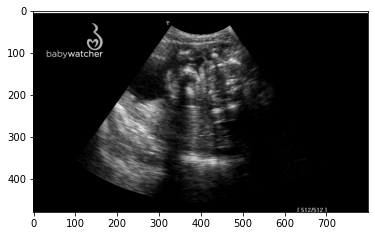

In [12]:
import os, random, cv2, Classify
import numpy as np
from matplotlib import pyplot as plt

oldpwd = os.getcwd()
os.chdir('..')
os.chdir('../resources')
pwd = os.getcwd()
os.chdir(oldpwd)

# 1. Load image(s)
img_name = random.choice(os.listdir(pwd + '/images/1'))
print(img_name)
img = cv2.imread(pwd + '/images/1/' + img_name, 0)
    
# 2. Load models
classifiers = Classify.load_svm(pwd + '/SVM')
print(classifiers)
plt.imshow(img, cmap='gray')

# 3. Analyse image

In [15]:
%%time
wanted_classifiers = ['head','spine']  # The keys you want
wanted_classifiers = dict((k, classifiers[k]) for k in wanted_classifiers if k in classifiers)
feat_image, result, pred = Classify.analyse_image(img, wanted_classifiers,  crop_thresh=0.2, blur_size=10, bright_strength=1, sharp_strength=1,
                               square_step=True, windows=[(64, 64), (96, 96), (128, 128), (192, 192)], window_stride=16, pred_threshold = 0.99)
print(len(pred), len(result))
result

1478 0
CPU times: user 19.7 s, sys: 525 ms, total: 20.2 s
Wall time: 22 s


/Users/codingC/IdeaProjects/Project3-1/src/HOG/Classify.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['highest_pred'] = df.drop(['x', 'y', 'hog', 'window_size', 'window'], axis=1).max(axis=1)


,x,y,window_size,window,hog,head,spine,highest,highest_pred


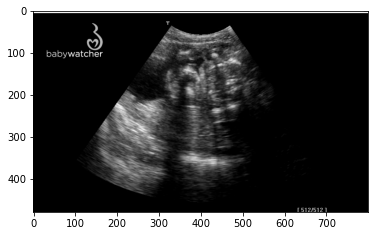

In [14]:
plt.imshow(feat_image)

In [4]:
from Classify import iou_value

r = res2.reset_index(drop=True)
i=0
to_drop = []
while i < len(r):
    for idx1 in range(i+1, len(r)):
        row = r.iloc[i]
        row1 = r.iloc[idx1]
        if i==idx1:
            continue
        c, c1 = row[['x','y']], row1[['x','y']]
        box = [c[0], c[1], c[0]+row['window_size'][0], c[1]+row['window_size'][1]]
        box1 = [c1[0], c1[1], c1[0]+row1['window_size'][0], c1[1]+row1['window_size'][1]]
        if bb_intersection_over_union(box, box1)> 0.7:
            if row['highest_pred'] > row['highest_pred']:
                to_drop.append(idx1)
            else:
                to_drop.append(i)
            idx = 0
            break
    i = i+1
r = r.drop(to_drop, axis=0)
r

NameError: name 'res2' is not defined

In [ ]:
from Classify import draw_boxes
feat2 = draw_boxes(img, r)
plt.imshow(feat2)